In [1]:
import numpy as np
import h5py
import pickle
import sys
sys.path.insert(0,'..')
from pygwb.statistical_checks import StatisticalChecks

# Statistical checks: a first introduction

In this tutorial, an overview of the statistical checks module of pyGWB is provided. More specifically, we will cover the initializiation of the class, as well as the various outputs of the class methods.

There are various ways to initialze the statistical checks module:
- Directly providing the required input.
- Reading in a baseline object saved to a pickle file
- Reading in the required input that was previously saved to a file (pickle or hdf5)

We will briefly cover each of these options below.

## Direct initialization of statistical checks module

The direct initialization of the statistical checks module requires the following input:
- GPS times
- Sliding point estimates
- Sliding sigmas
- Naive sigmas
- Sensitivity integrand
- Point estimate integrand
- Frequencies (might be changed)
- Bad GPS times
- Delta sigma values
- Directory where the plots will be saved
- Name of the baseline
- Path to parameter file with parameters used during the analysis run

In [ ]:
#Add more here. Maybe fake arrays for each of the quantities above?

Furthermore, a path to the parameters that were used during the analysis needs to be provided. This file includes the segment duration, the frequency resolution, etc.:

In [ ]:
param_file = ""

In addition, the statistical checks module produces a series of plots that will be saved in a directory specified by the user:

In [ ]:
plot_dir = ""

In [ ]:
#Add necessary input

In [ ]:
statistical_checks_direct_ini = StatisticalChecks(sliding_times_all, sliding_omega_all, sliding_sigmas_all, naive_sigma_all, sensitivity_integrand, point_estimate_integrand, freqs, badGPSTimes, delta_sigmas, plot_dir, baseline_name, param_file)

As mentioned previously, the goal of the statistical checks module is to create a series of plots that illustrate various quantities of the analysis and check these quantities for consistency. One can choose to generate one of these plots separately by calling the correspoding method (after which it will be saved to the directory specified above). For example, if one wants to look at the running poitn estimate, one would call:

In [ ]:
statistical_checks_direct_ini.plot_running_point_estimate()

If instead, one wants to generate all the plots from the statistical checks module, one calls:

In [ ]:
statistical_checks_direct_ini.generate_all_plots()

The above steps illustrate how to use the statistical checks module. We will now cover the initialization though baseline pickle file and other types of files. The generation of plots will not be covered anymore, as it is identical to what was done in this part of the tutorial.

## Initialization through baseline pickle file

The baseline object forms a key aspect of the pyGWB package. This object will contain the results of a pyGWB analysis run and can be saved to a pickle file. This baseline pickle file can then be read in to initialize the statistical checks module. The path to such a file needs to be specified, e.g.:

In [2]:
baseline_file_pickle = "/home/max.lalleman/public_html/Code/New_Clone_pyGWB/pygwb/DAG/Baseline_tryout_2.pickle"

As in the previous cases, both a path to the parameter file used for the analysis and a path where the output of the statistical checks will be saved need to be provided:

In [3]:
param_file = "/home/kevin.turbang/public_html/Stochastic_lite/statistical-checks-new/test/test_data/parameters_baseline_test.ini"
plot_dir = '/home/kevin.turbang/public_html/Stochastic_lite/statistical-checks-new/tutorials/plots/Max_pickle/'

One can then initialize a statistical checks object as follows:

In [ ]:
statistical_checks_from_baseline = StatisticalChecks.from_baseline_pickle(baseline_file_pickle, param_file, plot_dir)

/home/kevin.turbang/public_html/Stochastic_lite/statistical-checks-new/tutorials/../pygwb/delta_sigma_cut.py:155: RuntimeWarning: divide by zero encountered in true_divide
  S_alpha = 3 * H0 ** 2 / (10 * np.pi ** 2) * 1.0 / freq ** 3
/home/kevin.turbang/public_html/Stochastic_lite/statistical-checks-new/tutorials/../pygwb/util.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  var = 1 / np.sum(var_f ** (-1) * weights ** 2)
/home/kevin.turbang/public_html/Stochastic_lite/statistical-checks-new/tutorials/../pygwb/util.py:65: RuntimeWarning: invalid value encountered in true_divide
  Y = np.nansum(Y_f * weights * (var / var_f))


Note that, as mentioned previously, the steps to generate (part of) the plots is identical to what was done in the previous part of the tutorial. This will therefore not be covered again. We now proceed to the initialization through pickle or hdf5 file.

In [4]:
baseline = Baseline.load_from_pickle(baseline_file_pickle)

In [3]:
from pygwb.baseline import Baseline

In [20]:
baseline = Baseline.load_from_pickle(baseline_file_pickle)

In [32]:
baseline.delta_sigmas.shape

(20592,)

In [31]:
6864*3

20592

In [56]:
baseline.interferometer_1.psd_spectrogram.shape

(81, 65537)

In [50]:
baseline.interferometer_2.average_psd.shape

(77, 54593)

In [51]:
baseline.interferometer_1.average_psd.shape

(77, 54593)

In [52]:
baseline.average_csd.shape

(77, 54593)

In [27]:
baseline.point_estimate_spectrogram.shape

(6864, 54593)

In [53]:
baseline.sigma_spectrogram.shape

(77, 54593)

In [5]:
statistical_checks_from_baseline.delta_sigmas_all

array([0.1290913 , 0.23936889, 0.09187681])

In [9]:
statistical_checks_from_baseline.point_estimate_integrand.shape

(54593,)

In [6]:
statistical_checks_from_baseline.delta_sigmas_cut

array([0.1290913 , 0.09187681])

In [5]:
statistical_checks_from_baseline.generate_all_plots()

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py38/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py38/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


## Initialization through pickle or hdf5 file

Since the initialization through pickle or hdf5 file is similar, we will only cover the hdf5 case. For pickle files, one just needs to pass the paths to the pickle files and initialize the statistical checks in the same way as below.

We start by providing two paths: one to the file containing PSDs and CSDs, and the other that contains all the necessary input such as a point estimate and sigma spectrogram, the bad GPS times, the values of the delta sigma cut, etc.:

In [ ]:
hdf5_file_PSD = ""
hdf5_file_point_estimate = ""

In addition, the name of the baseline needs to be specified: 

In [ ]:
baseline_name = "H1L1"

Another input in this case is the overlap reduction function, which needs to be passed as a gwpy.frequencyseries:

In [ ]:
orf = gwpy.frequencyseries.FrequencySeries(...) #Needs to be filled in

As in the previous cases, both a path to the parameter file used for the analysis and a path where the output of the statistical checks will be saved need to be provided:

In [ ]:
param_file = ""
plot_dir = ""

The statistical checks class is then initialized as follows:

In [ ]:
#To be checked if we end up writing a 'from_file' method

In [ ]:
statistical_checks_from_file = StatisticalChecks.from_file(hdf5_file_point_estimate, hdf5_file_PSD, param_file, plot_dir, baseline_name, orf)

As producing the statistical checks plots is analogous to what has been done in the first part of the tutorial, this concludes the tutorial. We now move on to the comparison of the stochastic.m and pyGWB statistical checks results.

# Comparing Matlab results of statistical checks to pyGWB

## Matlab results

As a further test of the pyGWB statistical checks module, we consider the results produced by the stochastic.m (Matlab) code for the GPS times 1241280019-1242489618 for the HL baseline during O3. The results of the statistical checks as done by stochastic.m can be found [here](https://git.ligo.org/stochastic/isotropic-o3a/-/blob/master/time_shifted_runs/1241280019-1242489618_v1/HL/isotropic_results.md). To be able to compare to the output of the stochastic.m code, we first import these results and initialize the pyGWB statistical checks class with this imported data.

In [1]:
mat_dir = "/home/irina.dvorkin/StochRepo/isotropic-o3a/time_shifted_runs/1241280019-1242489618_v1/HL/output/mats/"
pproc_dir = "/home/irina.dvorkin/StochRepo/isotropic-o3a/time_shifted_runs/1241280019-1242489618_v1/HL/pproc/a0/"
plot_dir = '/home/kevin.turbang/public_html/Stochastic_lite/statistical-checks-new/tutorials/plots/'
param_file = "/home/kevin.turbang/public_html/Stochastic_lite/statistical-checks-new/test/test_data/parameters_baseline_test.ini"

In [2]:
njobs = 47
segment_duration = 192
deltaF = 0.03125
dsc = 0.2
sampling_frequency = 1024
segs = segment_duration * deltaF * 2 - 1
deltaT = 1 / sampling_frequency
baseline_name = "H1L1"
read_bad_times = True

In [13]:
sliding_omega_all = np.array([])
sliding_sigmas_all = np.array([])
naive_sigma_all = np.array([])
sliding_times_all = np.array([])
for nn in range(njobs):
    jn = nn + 1
    file1 = "%sH1L1.job%d.mat" % (mat_dir, jn)
    with h5py.File(file1, "r") as FF:
        try:
            sliding_omega_all = np.append(
                sliding_omega_all,
                np.array(FF["ccStat"][0]).flatten() / segment_duration,
            )
            sliding_sigmas_all = np.append(
                sliding_sigmas_all,
                np.array(FF["ccSigma"][0]).flatten() / segment_duration,
            )
            naive_sigma_all = np.append(
                naive_sigma_all,
                np.array(FF["naiSigma"][0]).flatten() / segment_duration,
            )
            sliding_times_all = np.append(
                sliding_times_all, np.array(FF["segmentStartTime"][0]).flatten()
            )
        except:
            print("No data for job %u" % jn)
            continue
delta_sigmas = (np.abs(naive_sigma_all - sliding_sigmas_all)/ naive_sigma_all)

No data for job 25


In [14]:
file_bad = open(f"{pproc_dir[:-3]}badGPSTimes.dat", "r")
lines_bad = file_bad.readlines()
badGPSTimes = np.array([])
for line in lines_bad:
    temp = line.strip("\n")
    badGPSTimes = np.append(badGPSTimes, np.array([float(temp)]))

In [6]:
filename_pt = pproc_dir + baseline_name + "_ptEstIntegrand.dat"
point_estimate_integrand = np.genfromtxt(filename_pt, comments="%")
freqs=point_estimate_integrand[:, 1]
point_estimate_integrand=point_estimate_integrand[:,2]+1j*point_estimate_integrand[:,3]

In [7]:
filename_sens = pproc_dir + baseline_name + "_sensIntegrand.dat"
sensitivity_integrand = np.genfromtxt(filename_sens, comments="%")
sensitivity_integrand = sensitivity_integrand[:,2]

In [15]:
stat_checks = StatisticalChecks(sliding_times_all, sliding_omega_all, sliding_sigmas_all, naive_sigma_all, sensitivity_integrand, point_estimate_integrand, freqs, badGPSTimes, delta_sigmas, plot_dir, baseline_name, param_file)

In [11]:
%matplotlib inline

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py38/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


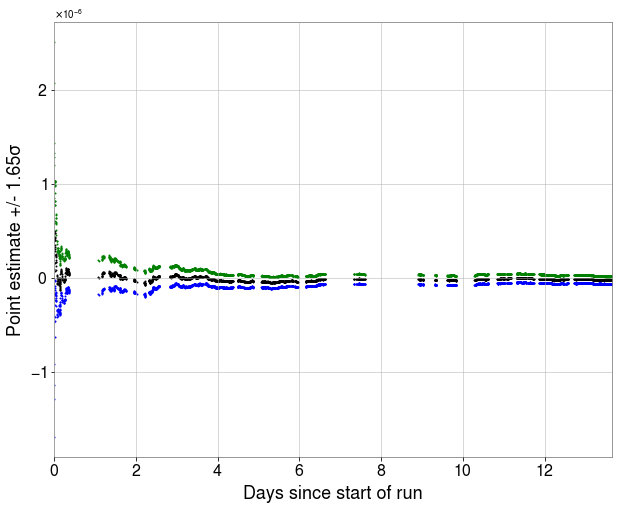

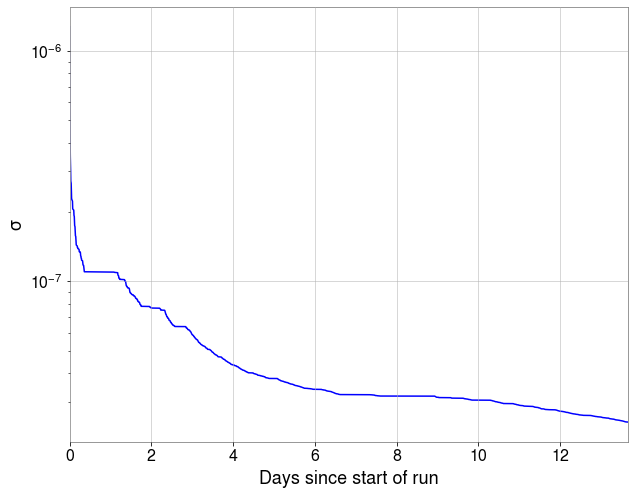

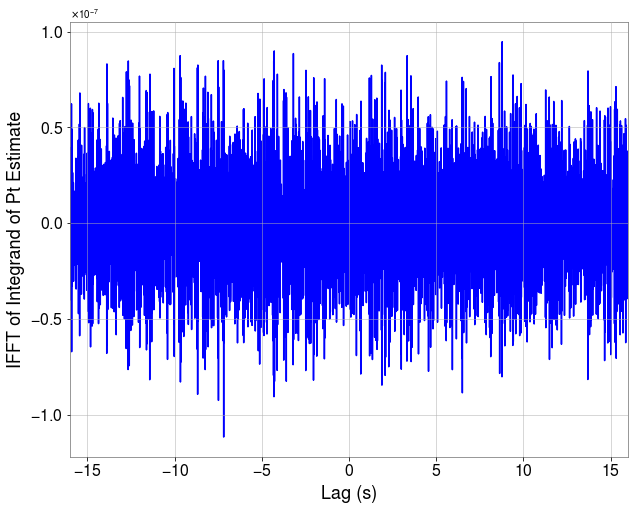

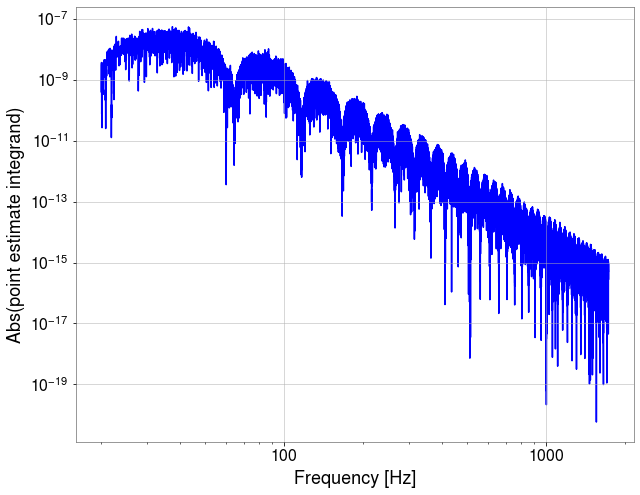

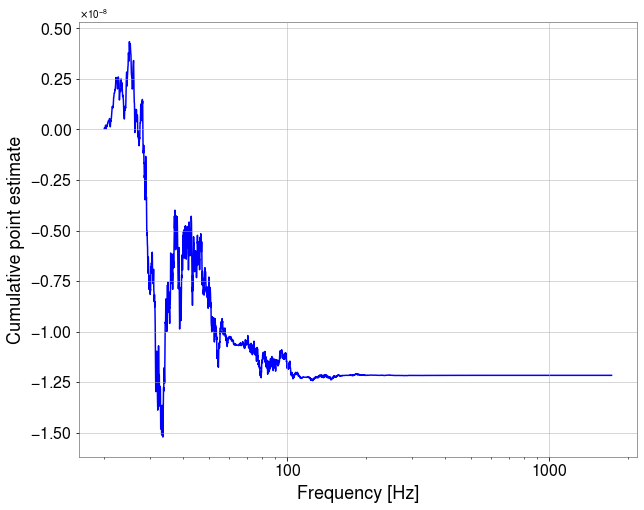

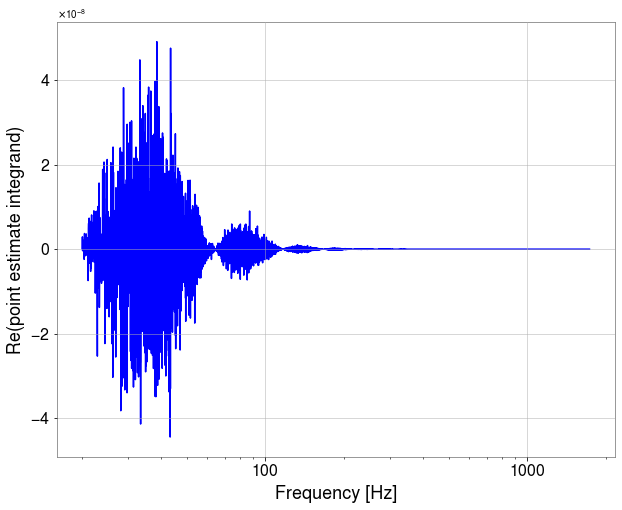

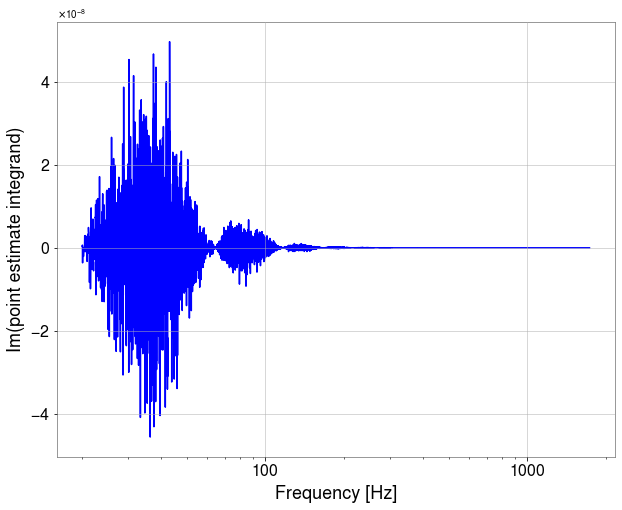

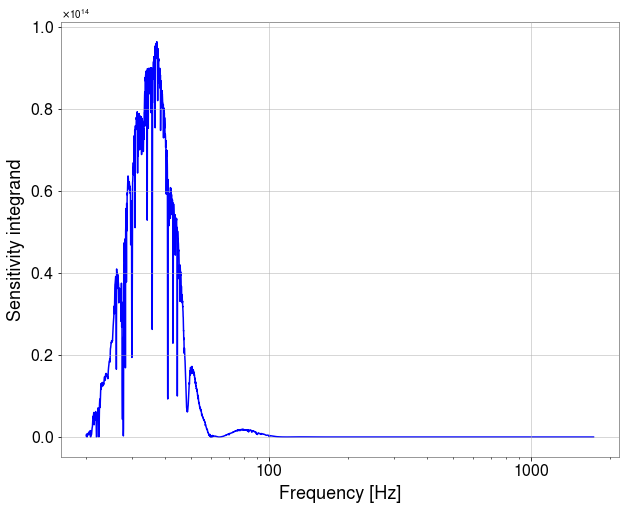

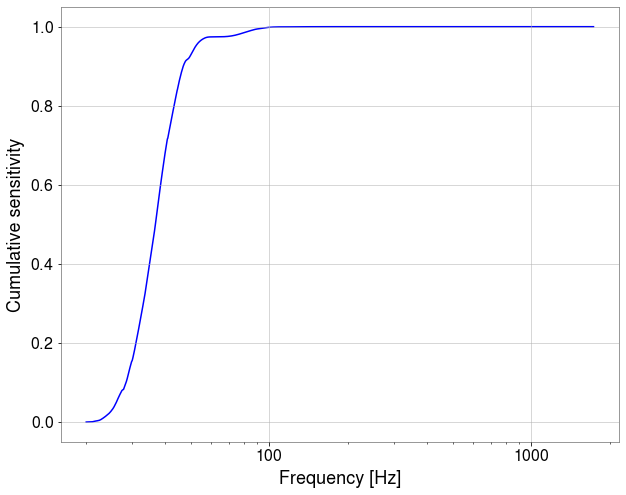

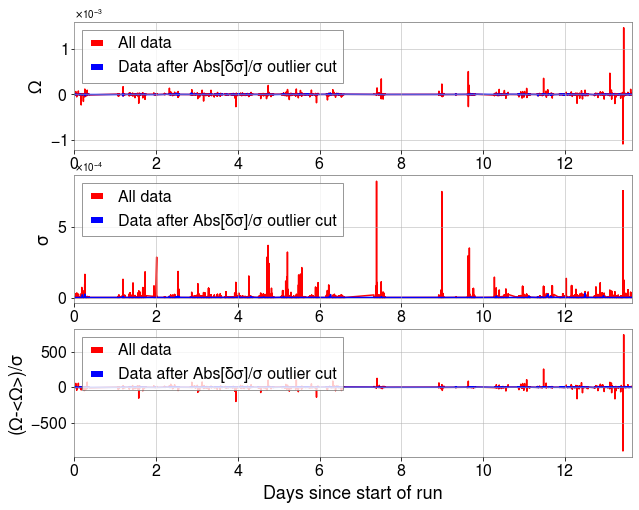

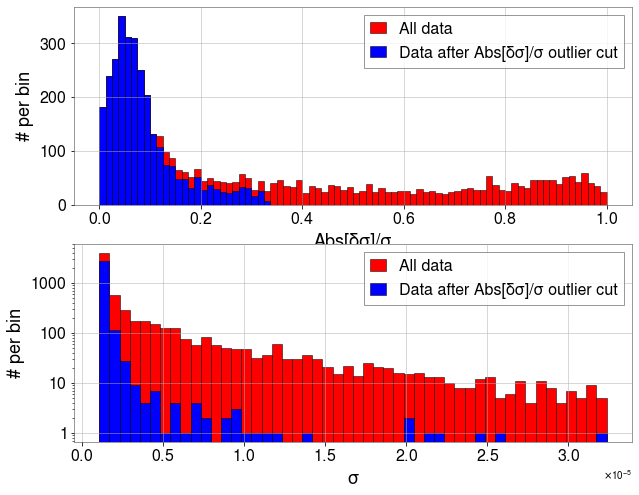

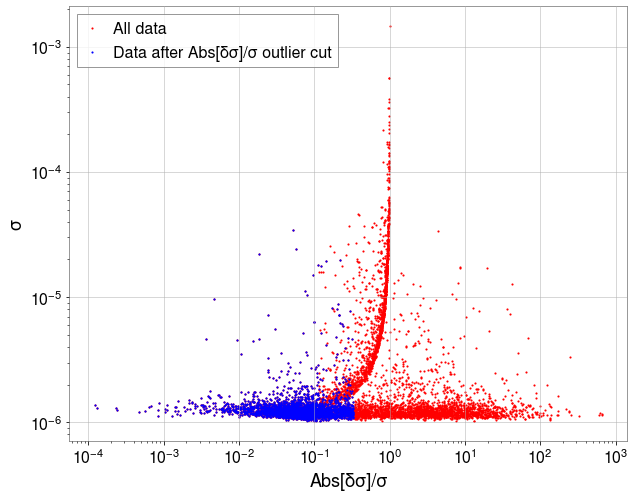

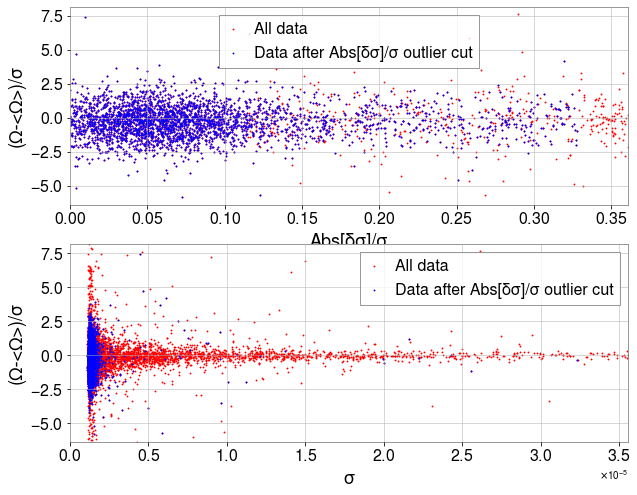

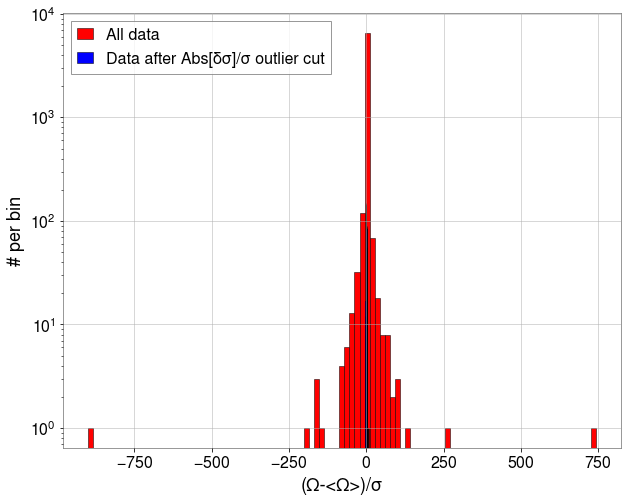

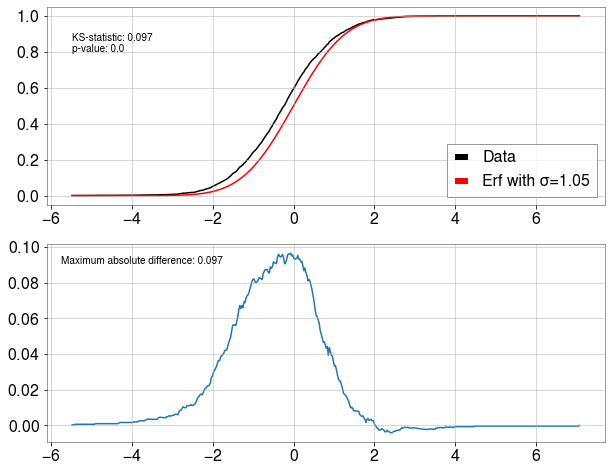

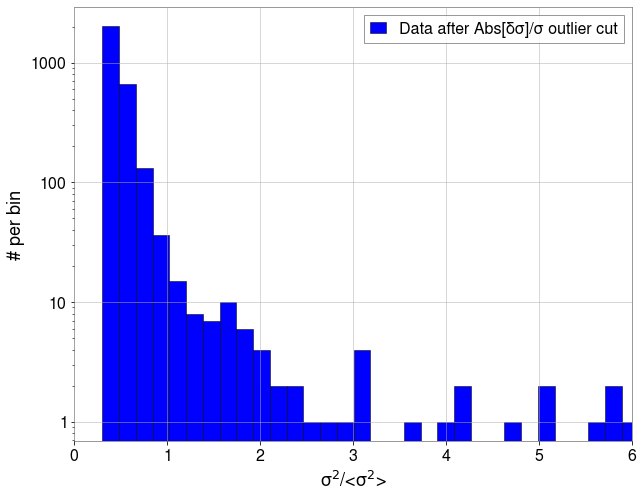

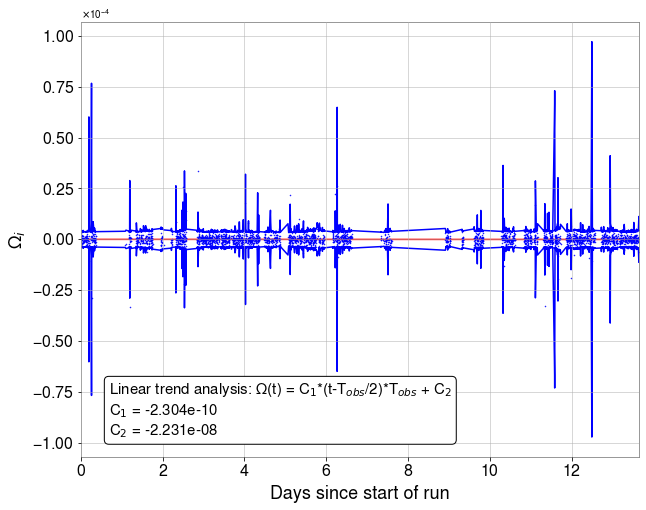

In [16]:
stat_checks.generate_all_plots()

## Statistical checks using pyGWB

In [2]:
from pygwb.statistical_checks_pipe import run_statistical_checks

In [3]:
param_file = "/home/kevin.turbang/pygwb_tutorial/pygwb_pipe/parameters_mock_for_notebook.ini"
baseline_directory = "/home/kevin.turbang/pygwb_tutorial/RUNS/MDC_run_Alba_script_new/output/"
combine_file = "/home/kevin.turbang/pygwb_tutorial/RUNS/MDC_run_Alba_script_new/point_estimate_sigma_spectra_alpha_0.0_fref_25_0-15831040.npz"
plot_dir = '/home/kevin.turbang/public_html/Stochastic_lite/statistical-checks-new/tutorials/plots/'

In [ ]:
stat_checks_pygwb_test=run_statistical_checks(baseline_directory, combine_file, plot_dir, param_file)

In [ ]:
stat_checks_pygwb_test.generate_all_plots()

In [29]:
test=np.load(baseline_directory+"csds_psds_880640-901120.npz", mmap_mode='r')

In [30]:
for k in test.keys():
    print(k)

freqs
avg_freqs
csd
avg_csd
psd_1
psd_2
avg_psd_1
avg_psd_2


In [32]:
test['csd'].shape

(211, 16383)

In [18]:
test=np.load(baseline_directory+"point_estimate_sigma_14540800-14561280.npz", mmap_mode='r')

In [24]:
for k in test.keys():
    print(k)

frequencies
point_estimate_spectrum
sigma_spectrum
point_estimate
sigma
point_estimate_spectrogram
sigma_spectrogram
badGPStimes
delta_sigmas


In [28]:
test['point_estimate_spectrogram'].shape

(207, 15361)

In [98]:
test="/home/max.lalleman/public_html/Code/New_Clone_pyGWB/pygwb/pygwb_pipe/DAG/Gating_pyGWB_Recovery_First_Test/output/csds_psds_0-20480.npz"

In [99]:
test=np.load(test, mmap_mode='r')
for k in test.keys():
    print(k)

freqs
avg_freqs
csd
avg_csd
psd_1
psd_2
avg_psd_1
avg_psd_2
csd_times
avg_csd_times
psd_times
avg_psd_times


In [113]:
np.arange(0,512+0.03125,0.03125).shape

(16385,)

In [120]:
freqs=np.arange(0,512+0.03125,0.03125)
cut=(500>=freqs)&(freqs>=20)

In [121]:
p1=test['psd_1']

In [122]:
p1.shape

(211, 16385)

In [125]:
freqs[cut]

array([ 20.     ,  20.03125,  20.0625 , ..., 499.9375 ,
       499.96875, 500.     ])

In [124]:
p1.shape

(211, 15361)

In [112]:
test['psd_1']

(211, 16385)

In [107]:
test['avg_freqs'].shape

(15361,)

In [87]:
test="/home/max.lalleman/public_html/Code/New_Clone_pyGWB/pygwb/pygwb_pipe/DAG/Gating_pyGWB_Recovery_First_Test/output/point_estimate_sigma_0-20480.npz"

In [88]:
test=np.load(test, mmap_mode='r')
for k in test.keys():
    print(k)

frequencies
point_estimate_spectrum
sigma_spectrum
point_estimate
sigma
point_estimate_spectrogram
sigma_spectrogram
badGPStimes
delta_sigma_alphas
delta_sigma_times
delta_sigma_values


In [92]:
test['frequencies'].shape

(15361,)

In [90]:
test['delta_sigma_times']

array([  256.,   352.,   448., ..., 19840., 19936., 20032.])

In [59]:
test['point_estimate_spectrogram'].shape

(207, 15361)

In [60]:
test['delta_sigma_values'].shape

(3, 207)

In [81]:
testarray=np.array([[1,2,3,4],[3,5,6,4]])

In [82]:
testarray

array([[1, 2, 3, 4],
       [3, 5, 6, 4]])

In [83]:
testarray=np.append(testarray,np.array([[1,2,3,4],[3,5,6,4]]),axis=0)

In [84]:
testarray

array([[1, 2, 3, 4],
       [3, 5, 6, 4],
       [1, 2, 3, 4],
       [3, 5, 6, 4]])

In [85]:
testarray=np.append(testarray,np.array([[1,2,3,4],[3,5,6,4]]),axis=0)

In [86]:
testarray.shape

(6, 4)

In [126]:
from pygwb.detector import Interferometer

In [129]:
import gwpy.timeseries

In [134]:
from pygwb.parameters import Parameters

In [140]:
params = Parameters()
params.update_from_file(path="../test/test_data/parameters_baseline_test.ini")
params.t0=1247644204
params.tf=1247645100
params.segment_duration=128

In [136]:
from pygwb.baseline import Baseline

In [154]:
H1 = Interferometer.get_empty_interferometer("H1")
L1 = Interferometer.get_empty_interferometer("L1")
ifo_list=[H1,L1]
HL_baseline = Baseline.from_parameters(H1, L1, params)

In [155]:
HL_baseline.orf_polarization="tensor"
HL_baseline.frequencies=np.arange(20,500+0.3125,0.03125)
HL_baseline.overlap_reduction_function

array([-0.73788784, -0.73743963, -0.7369909 , ...,  0.00285667,
        0.00284887,  0.00284105])

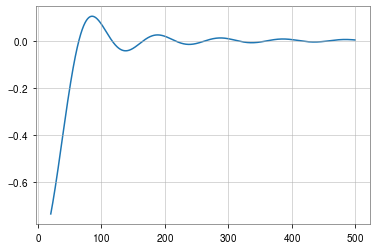

In [156]:
import matplotlib.pyplot as plt
plt.plot(np.arange(20,500+0.3125,0.03125),HL_baseline.overlap_reduction_function)

In [2]:
%matplotlib inline

In [2]:
from pygwb.statistical_checks_pipe import run_statistical_checks_from_file

In [5]:
temp=np.load(combine_file)

In [7]:
for k in temp.keys():
    print(k)

point_estimate
sigma


In [3]:
param_file = "/home/max.lalleman/public_html/Code/New_Clone_pyGWB/pygwb/pygwb_pipe/DAG/Gating_pyGWB_Recovery_First_Test/output/parameters_gating_final.ini"
baseline_directory = "/home/max.lalleman/public_html/Code/New_Clone_pyGWB/pygwb/pygwb_pipe/DAG/Gating_pyGWB_Recovery_First_Test/output/"
combine_file = "/home/max.lalleman/public_html/Code/New_Clone_pyGWB/pygwb/pygwb_pipe/DAG/Gating_pyGWB_Recovery_First_Test/combined_output/point_estimate_sigma_spectra_alpha_0.7_fref_25_0-15790080.npz"
plot_dir = '/home/kevin.turbang/public_html/Stochastic_lite/statistical-checks-new/tutorials/plots_new/'

In [4]:
stat_checks_pygwb_test=run_statistical_checks_from_file(baseline_directory, combine_file, plot_dir, param_file)

0
10
20
Done sliding
0
10
20
Done reading naive
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
212

In [5]:
stat_checks_pygwb_test.generate_all_plots()

AttributeError: 'StatisticalChecks' object has no attribute 'plot_cumulative_point_estimate'

In [5]:
from pygwb.omega_spectra import OmegaSpectrogram

In [ ]:
testOmega=OmegaSpectrogram